<a href="https://colab.research.google.com/github/pierce-s/MAT-421/blob/main/Module_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Pierce Sarmiento

---

#**Module G** 
**21.1** Numerical Integration

**21.2** Riemann's Integral

**21.3** Trapezoid Rule


---


**Section 21.1: Numerical Integration**

*Summary:*

For a given function, we can approximate its integral over an interval using numerical integration methods. We do this by discretizing an interval into a numerical grid. We can then approximate the area under the curve using the subintervals we have created.


---


*Implementation:*

We can illustrate the setup for this process by using the function $f(x) = x^3$. First, we need to define the function and the interval we are interested in.





In [44]:
# Define the function to be integrated
def f(x):
    return x**3

# Define the interval [a, b] and the number of subintervals n
a = 2
b = 5
n = 12

Then, we created a discretized array of numbers in the interval using `numpy`. We use this to create our plot of $f(x)$.

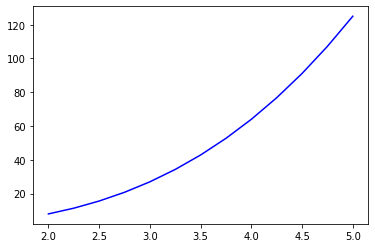

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the function
x = np.linspace(a, b, n+1)
plt.plot(x, f(x), 'b-')

Finally, we can visualize the subintervals we have created:

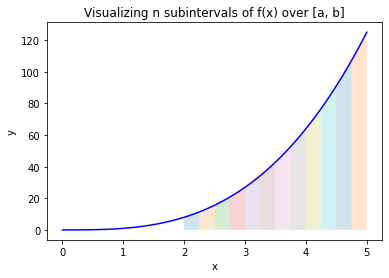

In [46]:
# Plot the subintervals
for i in range(n):
    plt.fill_between([x[i], x[i+1]], [0, 0], [f(x[i]), f(x[i+1])], alpha=0.2)

# Plot f(x) again
xi = np.linspace(0, b, 100)
fi = f(xi)
plt.plot(xi, fi, 'b-')

# Add labels and title to the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualizing n subintervals of f(x) over [a, b]')

# Show the plot
plt.show()

The graph shows 12 subintervals between 2 and 5.

---

**Section 21.2: Riemanns Integral**





*Summary:*

Using the subintervals that we created, we can sum the area of rectangles in each subinterval. As we include more subintervals our approximation will approach the area under the curve.


---


*Implementation:*

Let's use $f(x) = x^3$ from the previous section, as well as the subintervals we created. We will use leftpoint Riemann sums to approximate the area under the curve.




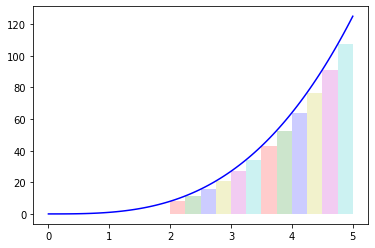

Riemann sum = 137.95


In [47]:
# Define the width of each subinterval
dx = (b - a) / n

# Compute the left endpoint of each subinterval
left_points = np.linspace(a, b-dx, n)

# Compute the Riemann sum using the left endpoint method
riemann_sum = np.sum(f(left_points) * dx)

# Colors to cycle through
colors = ['r', 'g', 'b', 'y', 'm', 'c']
for i in range(n):
    rect_x = [x[i], x[i], x[i+1], x[i+1], x[i]]
    rect_y = [0, f(x[i]), f(x[i]), 0, 0]
    plt.fill(rect_x, rect_y, colors[i % len(colors)], alpha=0.2)

# Show the plot
plt.plot(xi, fi, 'b-')
plt.show()

# Calculate riemann sum
print(f'Riemann sum = {riemann_sum:.2f}')

Our sum comes out to `137.95`. We can see visually that our sum is lower than the actual area under the curve, as each rectangle has part of the area missing from above it. Let's compare it to our analytical solution:

In [48]:
def F(x):
  return (x**4) / 4

exact = F(b) - F(a)

print(f"Exact: {exact}")
print(f"Riemann aprroximation: {riemann_sum:.2f}")

error = exact - riemann_sum

print (f"Error: {error}")

Exact: 152.25
Riemann aprroximation: 137.95
Error: 14.296875


If we add many more subintervals then our approximation should approach the exact solution.

In [50]:
# Define the function to be integrated
def f(x):
    return x**3

# Define the interval [a, b] and the number of subintervals n
a = 2
b = 5
n = 10000

# Define the width of each subinterval
dx = (b - a) / n

# Compute the left endpoint of each subinterval
left_points = np.linspace(a, b-dx, n)

# Compute the Riemann sum using the left endpoint method
riemann_sum = np.sum(f(left_points) * dx)

exact = F(b) - F(a)

print(f"Exact: {exact}")
print(f"Riemann aprroximation: {riemann_sum:.2f}")

error = exact - riemann_sum

print (f"Error: {error}")

Exact: 152.25
Riemann aprroximation: 152.23
Error: 0.017549527500023032


Now the difference between the approximation and the exact solution is much smaller.

---
**Section 21.2: Trapezoid Rule**

*Summary:*

We can construct trapezoids into each subinterval rather than rectangles, and achieve a similar result.


---


*Implementation:*

Using $f(x) = x^3$, as well as 12 subintervals, we can implement the trapezoid rule to find an approximation.




In [67]:
# Define the function to be integrated
def f(x):
    return x**3

a = 2
b = 5
n = 12

# Define the width of each subinterval
dx = (b - a) / n

# Compute the endpoints of each subinterval
xi = np.linspace(a, b, n+1)

# Compute the trapezoidal rule approximation of the integral
trapezoid_sum = (dx / 2) * (f(x[0]) + 2*np.sum(f(x[1:n])) + f(x[n]))

print(f"Exact: {exact}")
print(f"Trapezoid rule: {trapezoid_sum}")
error = exact - trapezoid_sum
print (f"Error: {abs(error)}")

Exact: 152.25
Trapezoid rule: 152.578125
Error: 0.328125


Here we see that with 12 sub intervals, the trapezoid method outperformed the left-endpoint Riemann approximation.